<a href="https://colab.research.google.com/github/chaeyeon530/Final-Team4/blob/main/%EC%9D%B4%EC%B1%84%EC%97%B0_%EC%B5%9C%EC%A2%85%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 & 임포트

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 한글 폰트 설정 (예: 나눔고딕)
mpl.rc('font', family='NanumGothic')  # 또는 'Malgun Gothic' (윈도우), 'AppleGothic' (Mac)

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/멋쟁이사자처럼_DAB6/파이널프로젝트/데이터/최종데이터셋/final_project.csv')

In [ ]:
#총판매건수 컬럼 추가
총판매건수 = df4['판매자_ID'].value_counts()
df = df4.merge(총판매건수, on='판매자_ID', how='left')
df4.rename(columns={'count': '총판매건수'}, inplace=True)

-----

---------
# 리뷰 점수 비중 확인

In [ ]:
review_counts = df4['리뷰_점수'].value_counts().sort_index()
review_proportions = df4['리뷰_점수'].value_counts(normalize=True).sort_index() * 100

review_summary = pd.DataFrame({
    '리뷰 개수': review_counts,
    '비중 (%)': review_proportions
})

# 리뷰 점수 인덱스 포맷 변경
review_summary.index = review_summary.index.astype(int).astype(str) + '점'

display(review_summary)

,리뷰 개수,비중 (%)
리뷰_점수,,
1점,14775,13.060081
2점,3936,3.479152
3점,9476,8.376130
4점,21348,18.870159
5점,63596,56.214477


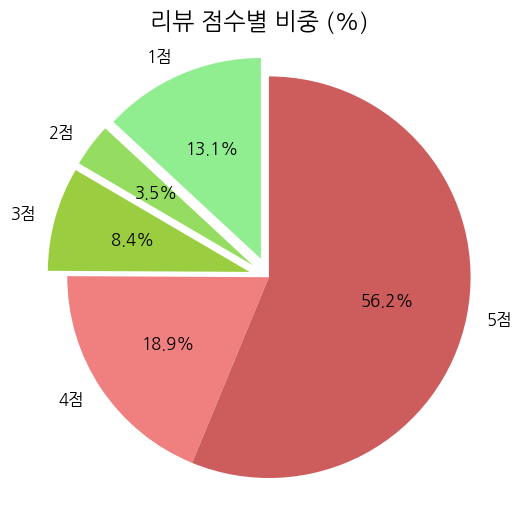

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 리뷰 비중 파이 차트
plt.figure(figsize=(6, 6))

# Explode values: 0 for no explode, positive value for explode distance
explode = [0.1 if score in ['1점', '2점', '3점'] else 0 for score in review_summary.index]

colors = ['lightgreen' ,'#95DD61', '#9ACD40' , 'lightcoral', 'indianred']

plt.pie(review_summary['비중 (%)'], labels=review_summary.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12}) # 폰트 크기를 12로 설정
plt.title('리뷰 점수별 비중 (%)', fontsize=17)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- 1~3점대의 리뷰가 약 24%로 개선이 필요할 것 같음
- 낮은 점수 중에서도 1점이 약 13%로 가장 많음 -> 극단적인 부정적인 리뷰 존재

-----
# 낮은 리뷰 분석 (워드 클라우드)

### 데이터 전처리

In [ ]:
# 판매자별 평균 리뷰 평점 계산 (리뷰제목과 리뷰내용이 있는경우만)
seller_review_score = df4.groupby('판매자_ID')['리뷰_점수'].mean().reset_index()
seller_review_score.rename(columns={'리뷰_점수': '평균_리뷰_점수'}, inplace=True)

seller_review_score

,판매자_ID,평균_리뷰_점수
0,0,1.725955
1,1,4.415094
2,2,4.579365
3,3,4.122822
4,4,4.451613
...,...,...
3091,3091,5.000000
3092,3092,1.000000
3093,3093,5.000000
3094,3094,4.000000


In [ ]:
low_review_sellers = seller_review_score[seller_review_score['평균_리뷰_점수'] <= 3]
low_review_sellers

,판매자_ID,평균_리뷰_점수
0,0,1.725955
21,21,1.800000
72,72,2.198529
105,105,2.363636
136,136,2.938272
...,...,...
3078,3078,1.000000
3079,3079,2.000000
3086,3086,3.000000
3088,3088,1.000000


In [ ]:
# 평균 리뷰 평점이 1점대 또는 2점대인 판매자 필터링 (1.0 이상 3.0 미만)
low_review_sellers = seller_review_score[(seller_review_score['평균_리뷰_점수'] >= 1.0) & (seller_review_score['평균_리뷰_점수'] < 3.0)]

# 평균 리뷰 평점이 1점대 또는 2점대인 판매자 데이터에 판매량 정보 병합
low_review_sellers_with_sales = pd.merge(low_review_sellers, 총판매건수.rename('총판매건수'), on='판매자_ID', how='left')

# 주문 개수가 1개인 판매자 제외
low_review_sellers_with_sales = low_review_sellers_with_sales[low_review_sellers_with_sales['총판매건수'] > 1]

# 결과 출력
print("평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 판매량 및 평균 리뷰 점수:")
display(low_review_sellers_with_sales)

평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 판매량 및 평균 리뷰 점수:


,판매자_ID,평균_리뷰_점수,총판매건수
0,0,1.725955,778
1,21,1.800000,6
2,72,2.198529,137
3,105,2.363636,11
4,136,2.938272,86
...,...,...,...
329,3050,2.500000,2
330,3051,1.000000,4
333,3058,1.500000,2
334,3059,1.000000,2


In [ ]:
# 평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 리뷰 데이터 필터링
low_review_seller_ids = low_review_sellers_with_sales['판매자_ID'].unique()
low_review_data = df4[df4['판매자_ID'].isin(low_review_seller_ids)]

# 리뷰 제목 및 내용이 있는 데이터만 선택
low_review_data_with_content = low_review_data.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 리뷰 (제목 또는 내용 포함):")
display(low_review_data_with_content[['판매자_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용']])

평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 리뷰 (제목 또는 내용 포함):


,판매자_ID,리뷰_점수,리뷰_제목,리뷰_내용
21,21,2.0,NaN,os correios estäo em greve... näo recebi nenhu...
201,136,5.0,Nota 10,NaN
306,0,1.0,NaN,Anunciam um produto que não tem em estoque e a...
461,286,1.0,NaN,ainda não recebi o produto acredito que não se...
499,301,1.0,NaN,Comprei DOIS porta talheres e recebi apenas UM...
...,...,...,...,...
113851,0,1.0,NaN,Eu fiz a compra no 23/12/2017 e não no dia 19/...
113871,0,1.0,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA..."
113925,452,1.0,Não recomendo!!!,Comprei um cartão Micro SD XC I Classe 10 e re...
113951,1035,1.0,NaN,"Atendimento horrível, fiquei esperando o produ..."


In [ ]:
# 리뷰_제목 또는 리뷰_내용이 null 값이 아닌 데이터만 선택
review_data_with_content = df.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
review_data_with_content

,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count
0,1,1,배송완료,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,sao paulo,SP,1.0,1,1,2017-10-06 11:07:15,29.99,8.72,1.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,38.71,"상품권, 신용카드",1,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,-23.680729,-46.444238,3149.0,-23.576983,-46.587161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,월,53
1,2,2,배송완료,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2,barreiras,BA,1.0,2,2,2018-07-30 03:24:27,118.70,22.76,1.0,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,141.46,보레토(전자고지서),2,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,-19.807681,-43.980427,47813.0,-12.177924,-44.660711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,향수,화,126
3,4,4,배송완료,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,4,sao goncalo do amarante,RN,1.0,4,4,2017-11-23 19:45:59,45.00,27.20,1.0,59.0,468.0,3.0,450.0,30.0,10.0,20.0,belo horizonte,MG,72.20,신용카드,4,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,31842.0,-19.837682,-43.924053,59296.0,-5.774190,-35.271143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,애완용품,토,156
6,7,7,송장발급,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,7,santa rosa,RS,1.0,7,7,2017-04-19 13:25:17,49.90,16.05,1.0,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,65.95,신용카드,7,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,5455.0,-23.541383,-46.711854,98900.0,-27.865358,-54.470128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,화,52
10,11,11,배송완료,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,11,rio de janeiro,RJ,1.0,11,11,2017-05-22 19:50:18,99.00,30.53,2.0,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,cariacica,ES,259.06,신용카드,11,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,-20.278513,-40.411675,20780.0,-22.896463,-43.272172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업/건축,정원 도구,화,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114081,99433,99433,배송완료,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,96088,campo do tenente,PR,1.0,32949,906,2017-12-27 10:09:52,55.90,15.14,1.0,34.0,372.0,2.0,300.0,16.0,6.0,12.0,jaragua do sul,SC,71.04,신용카드,98402,1.0,NaN,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19 00:00:00,2018-01-21 02:51:39,89251.0,-26.486691,-49.081236,83870.0,-25.985590,-49.678273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,악기,수,67
114087,99438,99438,배송완료,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,96093,praia grande,SP,1.0,300,197,2018-02-12 13:10:37,174.90,20.10,1.0,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,tupa,SP,195.00,신용카드,98407,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,17602.0,-21.930548,-50.498348,11722.0,-24.001500,-46.449864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,유아용품,화,79
114088,99

In [ ]:
# 리뷰 점수가 1점 이상 3점 미만인 데이터 필터링
low_score_reviews_with_content = review_data_with_content[(review_data_with_content['리뷰_점수'] >= 1.0) & (review_data_with_content['리뷰_점수'] < 3.0)]

# 결과 출력
print("리뷰 제목 또는 내용이 있으며 리뷰 점수가 1점 이상 3점 미만인 데이터:")
display(low_score_reviews_with_content)

리뷰 제목 또는 내용이 있으며 리뷰 점수가 1점 이상 3점 미만인 데이터:


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count
6,7,7,송장발급,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,7,santa rosa,RS,1.0,7,7,2017-04-19 13:25:17,49.90,16.05,1.0,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,65.95,신용카드,7,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,5455.0,-23.541383,-46.711854,98900.0,-27.865358,-54.470128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,화,52
10,11,11,배송완료,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,11,rio de janeiro,RJ,1.0,11,11,2017-05-22 19:50:18,99.00,30.53,2.0,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,cariacica,ES,259.06,신용카드,11,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,-20.278513,-40.411675,20780.0,-22.896463,-43.272172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업/건축,정원 도구,화,239
11,11,11,배송완료,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,11,rio de janeiro,RJ,2.0,11,11,2017-05-22 19:50:18,99.00,30.53,2.0,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,cariacica,ES,259.06,신용카드,11,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,-20.278513,-40.411675,20780.0,-22.896463,-43.272172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업/건축,정원 도구,화,239
21,21,21,배송완료,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,21,sao paulo,SP,1.0,21,21,2017-09-25 04:04:09,109.90,8.96,1.0,46.0,2345.0,6.0,525.0,21.0,16.0,13.0,sao paulo,SP,118.86,보레토(전자고지서),20,2.0,NaN,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21,4438.0,-23.676570,-46.669897,4001.0,-23.572939,-46.651115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,건강/뷰티,월,6
26,26,26,배송완료,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12 00:00:00,26,rio de janeiro,RJ,1.0,26,26,2018-02-28 02:30:44,109.90,15.53,1.0,46.0,595.0,2.0,500.0,16.0,12.0,22.0,santo andre,SP,125.43,보레토(전자고지서),25,2.0,NaN,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58,9220.0,-23.622288,-46.536901,21715.0,-22.879477,-43.440264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,기타 재미용품,화,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114072,99424,99424,배송완료,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,96080,araraquara,SP,1.0,3202,202,2017-10-19 04:28:24,36.90,11.85,1.0,37.0,497.0,4.0,150.0,16.0,7.0,11.0,sao paulo,SP,48.75,보레토(전자고지서),98393,1.0,NaN,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22,2310.0,-23.472815,-46.600729,14802.0,-21.772226,-48.180222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,유아용품,목,341
114074,99426,99426,배송완료,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09 00:00:00,96082,valinhos,SP,1.0,3024,500,2018-03-27 20:05:26,109.97,36.86,1.0,30.0,606.0,2.0,9700.0,27.0,15.0,92.0,s jose do rio preto,SP,146.83,신용카드,98395,1.0,NaN,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03,15014.0,-20.818959,-49.377346,13272.0,-22.951602,-47.001996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# low_score_reviews_with_content.to_csv("review_1_2.csv", index=False)

In [ ]:
# 판매자별 평균 리뷰 평점 계산 (리뷰제목과 리뷰내용이 있는경우만)
seller_review_score = df4.groupby('판매자_ID')['리뷰_점수'].mean().reset_index()
seller_review_score.rename(columns={'리뷰_점수': '평균_리뷰_점수'}, inplace=True)

seller_review_score

,판매자_ID,평균_리뷰_점수
0,0,1.725955
1,1,4.415094
2,2,4.579365
3,3,4.122822
4,4,4.451613
...,...,...
3091,3091,5.000000
3092,3092,1.000000
3093,3093,5.000000
3094,3094,4.000000


In [ ]:
low_review_sellers = seller_review_score[seller_review_score['평균_리뷰_점수'] <= 3]
low_review_sellers

,판매자_ID,평균_리뷰_점수
0,0,1.725955
21,21,1.800000
72,72,2.198529
105,105,2.363636
136,136,2.938272
...,...,...
3078,3078,1.000000
3079,3079,2.000000
3086,3086,3.000000
3088,3088,1.000000


In [ ]:
# 평균 리뷰 평점이 1점대 또는 2점대인 판매자 필터링 (1.0 이상 3.0 미만)
low_review_sellers = seller_review_score[(seller_review_score['평균_리뷰_점수'] >= 1.0) & (seller_review_score['평균_리뷰_점수'] < 3.0)]

# 평균 리뷰 평점이 1점대 또는 2점대인 판매자 데이터에 판매량 정보 병합
low_review_sellers_with_sales = pd.merge(low_review_sellers, seller_sales, on='판매자_ID')

# 주문 개수가 1개인 판매자 제외
low_review_sellers_with_sales = low_review_sellers_with_sales[low_review_sellers_with_sales['주문_개수'] > 1]

# 결과 출력
print("평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 판매량 및 평균 리뷰 점수:")
display(low_review_sellers_with_sales)

평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 판매량 및 평균 리뷰 점수:


,판매자_ID,평균_리뷰_점수,주문_개수
0,0,1.725955,778
1,21,1.800000,6
2,72,2.198529,137
3,105,2.363636,11
4,136,2.938272,86
...,...,...,...
329,3050,2.500000,2
330,3051,1.000000,4
333,3058,1.500000,2
334,3059,1.000000,2


In [ ]:
# 평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 리뷰 데이터 필터링
low_review_seller_ids = low_review_sellers_with_sales['판매자_ID'].unique()
low_review_data = df[df['판매자_ID'].isin(low_review_seller_ids)]

# 리뷰 제목 및 내용이 있는 데이터만 선택
low_review_data_with_content = low_review_data.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 리뷰 (제목 또는 내용 포함):")
display(low_review_data_with_content[['판매자_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용']])

평균 리뷰 평점이 1점대 또는 2점대이며 주문 개수가 1개 초과인 판매자의 리뷰 (제목 또는 내용 포함):


,판매자_ID,리뷰_점수,리뷰_제목,리뷰_내용
21,21,2.0,NaN,os correios estäo em greve... näo recebi nenhu...
201,136,5.0,Nota 10,NaN
306,0,1.0,NaN,Anunciam um produto que não tem em estoque e a...
461,286,1.0,NaN,ainda não recebi o produto acredito que não se...
499,301,1.0,NaN,Comprei DOIS porta talheres e recebi apenas UM...
...,...,...,...,...
113851,0,1.0,NaN,Eu fiz a compra no 23/12/2017 e não no dia 19/...
113871,0,1.0,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA..."
113925,452,1.0,Não recomendo!!!,Comprei um cartão Micro SD XC I Classe 10 e re...
113951,1035,1.0,NaN,"Atendimento horrível, fiquei esperando o produ..."


In [ ]:
# 리뷰_제목 또는 리뷰_내용이 null 값이 아닌 데이터만 선택
review_data_with_content = df.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
review_data_with_content

,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count,배송지연일,배송지연일_구간,배송지연일_구간_30일,배송지연일_구간_10일,배송지연_여부
0,1,1,배송완료,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04,2017-10-10,2017-10-18,1,sao paulo,SP,1.0,1,1,2017-10-06,29.99,8.72,1.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,38.71,"상품권, 신용카드",1,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,-23.680729,-46.444238,3149.0,-23.576983,-46.587161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,월,53,-8.0,"[-50.0, 0.0)","[-30.0, 0.0)","[-10.0, 0.0)",정시 또는 조기
1,2,2,배송완료,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26,2018-08-07,2018-08-13,2,barreiras,BA,1.0,2,2,2018-07-30,118.70,22.76,1.0,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,141.46,보레토(전자고지서),2,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,-19.807681,-43.980427,47813.0,-12.177924,-44.660711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,향수,화,126,-6.0,"[-50.0, 0.0)","[-30.0, 0.0)","[-10.0, 0.0)",정시 또는 조기
3,4,4,배송완료,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22,2017-12-02,2017-12-15,4,sao goncalo do amarante,RN,1.0,4,4,2017-11-23,45.00,27.20,1.0,59.0,468.0,3.0,450.0,30.0,10.0,20.0,belo horizonte,MG,72.20,신용카드,4,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,31842.0,-19.837682,-43.924053,59296.0,-5.774190,-35.271143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,애완용품,토,156,-13.0,"[-50.0, 0.0)","[-30.0, 0.0)","[-20.0, -10.0)",정시 또는 조기
6,7,7,송장발급,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,7,santa rosa,RS,1.0,7,7,2017-04-19,49.90,16.05,1.0,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,65.95,신용카드,7,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,5455.0,-23.541383,-46.711854,98900.0,-27.865358,-54.470128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,화,52,NaN,NaN,NaN,NaN,정시 또는 조기
10,11,11,배송완료,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18,2017-05-29,2017-06-07,11,rio de janeiro,RJ,1.0,11,11,2017-05-22,99.00,30.53,2.0,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,cariacica,ES,259.06,신용카드,11,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,-20.278513,-40.411675,20780.0,-22.896463,-43.272172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업/건축,정원 도구,화,239,-9.0,"[-50.0, 0.0)","[-30.0, 0.0)","[-10.0, 0.0)",정시 또는 조기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114081,99433,99433,배송완료,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20,2018-01-26,2018-01-18,96088,campo do tenente,PR,1.0,32949,906,2017-12-27,55.90,15.14,1.0,34.0,372.0,2.0,300.0,16.0,6.0,12.0,jaragua do sul,SC,71.04,신용카드,98402,1.0,NaN,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19 00:00:00,2018-01-21 02:51:39,89251.0,-26.486691,-49.081236,83870.0,-25.985590,-49.678273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,악기,수,67,8.0,"[0.0, 50.0)","[0.0, 30.0)","[0.0, 10.0)",지연
114087,99438,99438,배송완료,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07,2018-02-28,2018-03-02,96093,praia grande,SP,1.0,300,197,2018-02-12,174.90,20.10,1.0,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,tupa,SP,195.00,신용카드,98407,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,

In [ ]:
# 리뷰 점수가 1점 이상 3점 미만인 데이터 필터링
low_score_reviews_with_content = review_data_with_content[(review_data_with_content['리뷰_점수'] >= 1.0) & (review_data_with_content['리뷰_점수'] < 3.0)]

# 결과 출력
print("리뷰 제목 또는 내용이 있으며 리뷰 점수가 1점 이상 3점 미만인 데이터:")
display(low_score_reviews_with_content)

리뷰 제목 또는 내용이 있으며 리뷰 점수가 1점 이상 3점 미만인 데이터:


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count,배송지연일,배송지연일_구간,배송지연일_구간_30일,배송지연일_구간_10일,배송지연_여부
6,7,7,송장발급,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,7,santa rosa,RS,1.0,7,7,2017-04-19,49.90,16.05,1.0,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP,65.95,신용카드,7,2.0,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,5455.0,-23.541383,-46.711854,98900.0,-27.865358,-54.470128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,화,52,NaN,NaN,NaN,NaN,정시 또는 조기
10,11,11,배송완료,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18,2017-05-29,2017-06-07,11,rio de janeiro,RJ,1.0,11,11,2017-05-22,99.00,30.53,2.0,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,cariacica,ES,259.06,신용카드,11,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,-20.278513,-40.411675,20780.0,-22.896463,-43.272172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업/건축,정원 도구,화,239,-9.0,"[-50.0, 0.0)","[-30.0, 0.0)","[-10.0, 0.0)",정시 또는 조기
11,11,11,배송완료,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18,2017-05-29,2017-06-07,11,rio de janeiro,RJ,2.0,11,11,2017-05-22,99.00,30.53,2.0,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,cariacica,ES,259.06,신용카드,11,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,-20.278513,-40.411675,20780.0,-22.896463,-43.272172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업/건축,정원 도구,화,239,-9.0,"[-50.0, 0.0)","[-30.0, 0.0)","[-10.0, 0.0)",정시 또는 조기
21,21,21,배송완료,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06,2017-10-09,2017-09-28,21,sao paulo,SP,1.0,21,21,2017-09-25,109.90,8.96,1.0,46.0,2345.0,6.0,525.0,21.0,16.0,13.0,sao paulo,SP,118.86,보레토(전자고지서),20,2.0,NaN,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21,4438.0,-23.676570,-46.669897,4001.0,-23.572939,-46.651115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,건강/뷰티,월,6,11.0,"[0.0, 50.0)","[0.0, 30.0)","[10.0, 20.0)",지연
26,26,26,배송완료,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26,2018-03-21,2018-03-12,26,rio de janeiro,RJ,1.0,26,26,2018-02-28,109.90,15.53,1.0,46.0,595.0,2.0,500.0,16.0,12.0,22.0,santo andre,SP,125.43,보레토(전자고지서),25,2.0,NaN,Demora muito entregar. Já passou o prazo e ain...,2018-03-16 00:00:00,2018-03-20 23:10:58,9220.0,-23.622288,-46.536901,21715.0,-22.879477,-43.440264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,기타 재미용품,화,28,9.0,"[0.0, 50.0)","[0.0, 30.0)","[0.0, 10.0)",지연
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114072,99424,99424,배송완료,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17,2017-11-21,2017-10-31,96080,araraquara,SP,1.0,3202,202,2017-10-19,36.90,11.85,1.0,37.0,497.0,4.0,150.0,16.0,7.0,11.0,sao paulo,SP,48.75,보레토(전자고지서),98393,1.0,NaN,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22,2310.0,-23.472815,-46.600729,14802.0,-21.772226,-48.180222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,유아용품,목,341,21.0,"[0.0, 50.0)","[0.0, 30.0)","[20.0, 30.0)",지연
114074,99426,99426,배송완료,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22,2018-04-11,2018-04-09,96082,valinhos,SP,1.0,3024,500,2018-03-27,109.97,36.86,1.0,30.0,606.0,2.0,9700.0,27.0,15.0,92.0,s jose do rio preto,SP,146.83,신용카드,98395,1.0,NaN,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12

In [ ]:
# low_score_reviews_with_content.to_csv("review_1_2.csv", index=False)

### 번역

In [ ]:
# 번역하기 위해 데이터 수 줄이기 -> 실행에 너무 오래 걸리는 이슈
# low_score_reviews_with_content 데이터프레임에서 1000개의 샘플 데이터 추출
low_score_reviews_sampled = low_score_reviews_with_content.sample(n=1000, random_state=42) # random_state를 설정하여 결과를 재현 가능하게 합니다.

# 샘플 데이터 확인
print("추출된 1000개의 샘플 데이터:")
display(low_score_reviews_sampled)

추출된 1000개의 샘플 데이터:


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count
35796,31207,31207,배송완료,2018-02-11 09:50:01,2018-02-11 10:08:53,2018-02-21 20:52:39,2018-03-08 18:51:32,2018-03-07 00:00:00,30839,sao paulo,SP,1.0,15610,419,2018-02-15 10:08:53,49.99,16.92,1.0,55.0,528.0,2.0,550.0,25.0,7.0,24.0,brasilia,DF,66.91,신용카드,31084,1.0,NaN,Cade o produto que comprei?,2018-03-09 00:00:00,2018-03-09 10:15:19,70719.0,-15.786284,-47.889118,1242.0,-23.546507,-46.658502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,문구류,일,29
7707,6760,6760,배송완료,2017-02-13 16:25:07,2017-02-14 16:30:11,2017-02-21 09:05:27,2017-03-13 15:05:18,2017-04-04 00:00:00,6746,belem,PA,1.0,443,307,2017-02-24 15:25:07,550.00,188.65,1.0,42.0,427.0,1.0,30000.0,50.0,75.0,56.0,sao paulo,SP,738.65,신용카드,6750,1.0,NaN,Paguei um frete caríssimo para receber o produ...,2017-03-14 00:00:00,2017-03-16 19:23:35,3908.0,-23.582519,-46.507194,66630.0,-1.379196,-48.465637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,건강/뷰티,월,61
23557,20552,20552,취소됨,2017-04-26 22:38:50,2017-04-27 01:15:17,NaN,NaN,2017-05-29 00:00:00,20373,santana de parnaiba,SP,4.0,11563,2117,2017-05-09 01:15:17,17.90,10.96,5.0,44.0,329.0,6.0,400.0,16.0,12.0,12.0,sao paulo,SP,144.30,신용카드,20502,2.0,NaN,o pedido foi cancelado conforme email de vcs e...,2017-06-01 00:00:00,2017-06-12 15:36:16,8420.0,-23.544933,-46.428858,6542.0,-23.473606,-46.868500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,수,15
47264,41245,41245,배송완료,2018-02-26 20:20:52,2018-02-26 20:30:53,2018-02-27 19:43:11,2018-03-02 23:22:08,2018-03-19 00:00:00,40620,sao paulo,SP,1.0,278,204,2018-03-02 20:30:53,394.65,17.51,1.0,36.0,1331.0,2.0,450.0,20.0,6.0,13.0,teresopolis,RJ,412.16,신용카드,41016,1.0,NaN,Recebi produto errado,2018-03-03 00:00:00,2018-03-04 21:54:23,25957.0,-22.431184,-42.970221,5641.0,-23.618089,-46.736880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,건강/뷰티,월,175
22343,19506,19506,배송완료,2017-12-18 10:44:33,2017-12-18 11:51:45,2017-12-21 22:52:36,2017-12-27 18:59:03,2018-01-11 00:00:00,19352,bauru,SP,1.0,11113,378,2017-12-22 11:51:45,184.90,12.79,1.0,63.0,420.0,3.0,250.0,16.0,4.0,12.0,sao jose do rio preto,SP,197.69,신용카드,19466,2.0,NaN,"Chegou bem antes do prazo previsto, porém,para...",2017-12-28 00:00:00,2017-12-28 15:16:32,15041.0,-20.790374,-49.418262,17034.0,-22.310732,-49.028852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,마켓플레이스,월,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67697,59115,59115,배송완료,2018-03-15 20:58:52,2018-03-15 21:10:35,2018-03-22 11:04:25,2018-04-13 17:54:37,2018-04-10 00:00:00,57877,novo hamburgo,RS,1.0,23895,72,2018-03-21 21:10:35,45.99,15.23,1.0,25.0,254.0,1.0,200.0,16.0,10.0,11.0,santana de parnaiba,SP,61.22,신용카드,58693,1.0,NaN,Um absurdo esse atraso,2018-04-12 00:00:00,2018-04-13 12:32:05,6506.0,-23.418614,-46.958876,93347.0,-29.682879,-51.165421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,장난감,목,137
32822,28642,28642,배송완료,2017-08-31 17:48:33,2017-08-31 18:05:20,2017-09-04 15:14:46,2017-09-15 20:05:52,2017-09-22 00:00:00,28327,maringa,PR,1.0,9485,75,2017-09-06 18:05:20,422.00,18.71,1.0,57.0,293.0,1.0,6250.0,60.0,10.0,40.0,ibitinga,SP,440.71,신용카드,28543,1.0,NaN,Solicito o cancelamento da compra pois a cor d...,2017-09-16 00:00:00,2017-09-19 19:56:53,14940.0,-21.757321,-48.829744,87013.0,-23.422486,-51.938405,NaN,NaN,N

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=56fffd6e4da655d1e048765dd5387baea281d55142dbbd1806fffe68c87b1e2d
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
!pip install google-cloud-translate

In [ ]:
!pip install -q deep-translator

from deep_translator import GoogleTranslator
GoogleTranslator(source='auto', target='ko').translate("Muito bom")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00


'매우 좋은'

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

def translate_to_korean(text):
    """
    주어진 텍스트를 한국어로 번역합니다.
    """
    if pd.isna(text):
        return None
    try:
        translated_text = GoogleTranslator(source='auto', target='ko').translate(text)
        return translated_text
    except Exception as e:
        print(f"번역 오류 발생: {e}")
        return None


In [ ]:
# '리뷰_제목' 및 '리뷰_내용' 열을 한국어로 번역
low_score_reviews_sampled['리뷰_제목_번역'] = low_score_reviews_sampled['리뷰_제목'].apply(translate_to_korean)
low_score_reviews_sampled['리뷰_내용_번역'] = low_score_reviews_sampled['리뷰_내용'].apply(translate_to_korean)
#
# 번역된 데이터 확인
display(low_score_reviews_sampled[['리뷰_점수', '리뷰_제목', '리뷰_제목_번역', '리뷰_내용', '리뷰_내용_번역']])

,리뷰_점수,리뷰_제목,리뷰_제목_번역,리뷰_내용,리뷰_내용_번역
35796,1.0,NaN,None,Cade o produto que comprei?,내가 구입 한 제품을 케이드?
7707,1.0,NaN,None,Paguei um frete caríssimo para receber o produ...,나는 내 집에서 제품을 받기 위해 매우 비싼 배송비를 지불했는데 일어나지 않았다.
23557,2.0,NaN,None,o pedido foi cancelado conforme email de vcs e...,5 월 8 일 이메일에 따라 주문이 취소되었습니다.
47264,1.0,NaN,None,Recebi produto errado,나는 잘못된 제품을 받았다
22343,2.0,NaN,None,"Chegou bem antes do prazo previsto, porém,para...",예정된 마감일 이전에 잘 도착했지만 드론 H18 항목은 호환되지 않았습니다. 내 드...
...,...,...,...,...,...
67697,1.0,NaN,None,Um absurdo esse atraso,이 지연이 터무니 없습니다
32822,1.0,NaN,None,Solicito o cancelamento da compra pois a cor d...,제품의 색상은 판매자 웹 사이트에 광고 된 사진과 크게 다르기 때문에 구매 취소를 ...
5928,1.0,NaN,None,Faz mais de 15 dias que fiz uma compra e nada ...,구매 한 지 15 일이 지났고 제품에 대해서는 아무것도 없었습니다. 그러나 그것을 ...
90336,1.0,NaN,None,Total falta de respeito com o consumidor. Além...,소비자에 대한 전적으로 존중 부족. 기간 동안 엄청난 마감일을 가진 배송을하지 않고...


In [ ]:
low_score_reviews_with_content_unique = low_score_reviews_sampled.drop_duplicates(subset=['리뷰_ID'])

### 워드 클라우드

In [ ]:
!pip install wordcloud

In [ ]:
import re

# Select the translated review title and content columns
review_content_and_title = low_score_reviews_with_content_unique[['리뷰_제목_번역', '리뷰_내용_번역']]

# Fill missing values with empty strings
review_content_and_title = review_content_and_title.fillna('')

# Concatenate the columns into a single Series, separated by a space
text_corpus_series = review_content_and_title['리뷰_제목_번역'] + ' ' + review_content_and_title['리뷰_내용_번역']

# Convert the Series into a single string
text_corpus = ' '.join(text_corpus_series)

# Define words to exclude
stop_words = ['제품이', '제품을', '제품', '제품은', '나는', '내', '은', '개의', '두', '이', '된', '것','때문에', '가', '할', '것을', '위해', '대한' ]

# Remove stop words from the text corpus
for word in stop_words:
    text_corpus = text_corpus.replace(word, '')

# Remove extra spaces created by removal
text_corpus = re.sub(r'\s+', ' ', text_corpus).strip()


print("Combined text corpus created with stop words removed.")

Combined text corpus created with stop words removed.


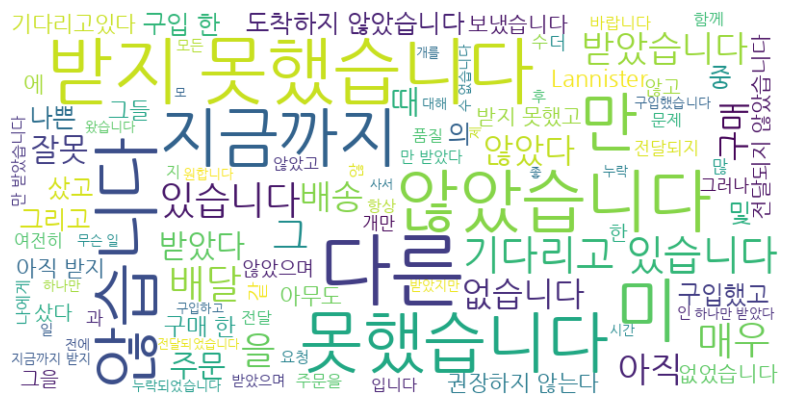

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np # numpy 라이브러리 추가

# Specify the path to a Korean font file
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # Example font path

# Instantiate a WordCloud object with Korean font and mask
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, font_path=font_path).generate(text_corpus)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
import re

# 텍스트 코퍼스를 단어로 분할
words = text_corpus.split()

# 숫자 단어를 제외한 단어 리스트 생성
filtered_words = [word for word in words if not re.match(r'^\d+$', word)]

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 단어 개수 출력 (상위 30개)
print("단어 빈도수 (상위 30개, 숫자 제외):")
for word, count in word_counts.most_common(30):
    print(f"{word}: {count}")

단어 빈도수 (상위 30개, 숫자 제외):
받지: 109
만: 102
않았습니다.: 92
못했습니다.: 86
다른: 84
한: 82
있습니다.: 76
아직: 69
미: 65
지금까지: 64
않습니다.: 57
도착하지: 56
배달: 53
기다리고: 52
구매: 49
못했습니다: 49
매우: 46
하나만: 46
을: 46
...: 45
샀고: 41
그: 41
받았습니다.: 39
받았다.: 38
전달되지: 38
일: 37
수: 37
더: 36
배송: 34
권장하지: 34


### 워드 클라우드 결과

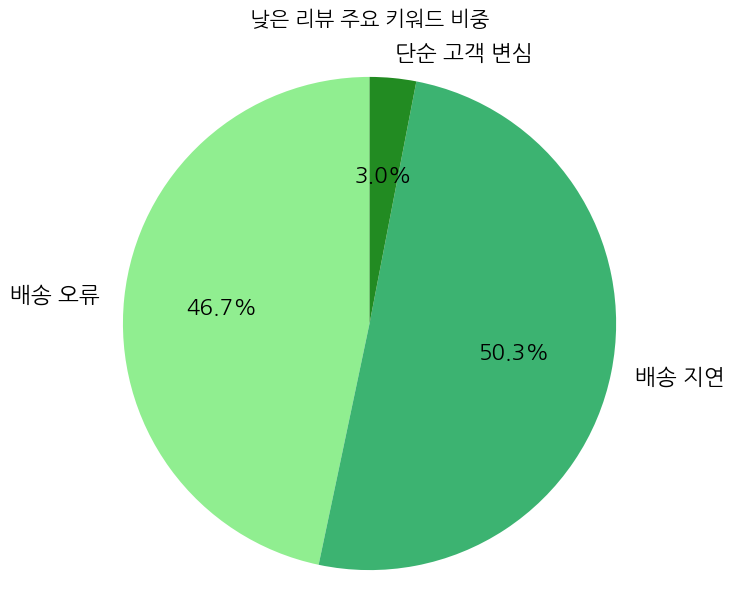

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 고객이 분류한 단어 빈도수 데이터 (수정된 데이터 사용)
category_counts = pd.Series({
    '배송 오류': 522,
    '배송 지연': 562,
    '단순 고객 변심': 34
})

colors = ['lightgreen', 'mediumseagreen', 'forestgreen']

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 16}) # 색상 팔레트를 Greens로 변경, 텍스트 크기 조정
plt.title('낮은 리뷰 주요 키워드 비중', fontsize=15, pad=20) # pad 값을 조정하여 간격 설정
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

---
# 높은 리뷰 분석 -> 번역, 워드클라우드

### 데이터 전처리

In [ ]:
# 평균 리뷰 점수가 높은 상위 10명의 판매자 선택
seller_review_score = df.groupby('판매자_ID')['리뷰_점수'].mean().reset_index()
seller_review_score.rename(columns={'리뷰_점수': '평균_리뷰_점수'}, inplace=True)

# 평균 리뷰 점수가 높은 상위 10명의 판매자 선택
top_10_sellers = seller_review_score.nlargest(10, '평균_리뷰_점수')

# 상위 10명의 판매자 ID 리스트 생성
top_10_seller_ids = top_10_sellers['판매자_ID'].unique()

# 상위 10명의 판매자에 해당하는 리뷰 데이터 필터링
top_10_seller_reviews = df[df['판매자_ID'].isin(top_10_seller_ids)]

# 리뷰 제목 및 내용이 있는 데이터만 선택
top_10_seller_reviews_with_content = top_10_seller_reviews.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("평균 리뷰 점수가 높은 상위 10명의 판매자의 리뷰 (제목 또는 내용 포함):")
display(top_10_seller_reviews_with_content[['판매자_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용']])

평균 리뷰 점수가 높은 상위 10명의 판매자의 리뷰 (제목 또는 내용 포함):


,판매자_ID,리뷰_점수,리뷰_제목,리뷰_내용
217,149,5.0,10,otima
273,180,5.0,NaN,"Produto de boa qualidade, chegou antes do praz..."
375,234,5.0,Contente,NaN
1077,180,5.0,NaN,Recebi bem antes do prazo informado e o produt...
2880,180,5.0,NaN,Eu recomendo muito a targaryen
5345,180,5.0,NaN,Recebi antes do prazo de entrega informado e o...
11590,180,5.0,NaN,"Comprei e chegou antes do prazo, tudo perfeito..."
14967,234,5.0,Otimo.,Fiquei muito satisfeita.
17529,180,5.0,NaN,Adorei a embalagem e o atendimento. Produto ma...
18516,180,5.0,NaN,"Adorei o produto, condiz com as imagens, a ent..."


In [ ]:
# 판매량 계산
seller_sales = df.groupby('판매자_ID').size().reset_index(name='주문_개수')

# 판매량과 평균 리뷰 점수 데이터 병합
merged_df = pd.merge(seller_sales, seller_review_score, on='판매자_ID')

# 주문 개수가 10개 이상인 판매자 필터링
sellers_with_sufficient_sales = merged_df[merged_df['주문_개수'] >= 10]

# 필터링된 데이터에서 평균 리뷰 점수가 높은 상위 10명의 판매자 선택
top_10_sellers_filtered = sellers_with_sufficient_sales.nlargest(10, '평균_리뷰_점수')

# 결과 출력
print("주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명:")
display(top_10_sellers_filtered)

주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명:


,판매자_ID,주문_개수,평균_리뷰_점수
180,180,34,5.0
992,992,12,5.0
1151,1151,12,5.0
1164,1164,11,5.0
1477,1477,17,5.0
1966,1966,13,5.0
2046,2046,11,5.0
2122,2122,11,5.0
2362,2362,10,5.0
2863,2863,15,5.0


In [ ]:
# 주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명의 판매자 ID 리스트 생성
top_10_filtered_seller_ids = top_10_sellers_filtered['판매자_ID'].unique()

# 상위 10명의 판매자에 해당하는 리뷰 데이터 필터링
top_10_filtered_seller_reviews = df[df['판매자_ID'].isin(top_10_filtered_seller_ids)]

# 리뷰 제목 및 내용이 있는 데이터만 선택
top_10_filtered_seller_reviews_with_content = top_10_filtered_seller_reviews.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명의 리뷰 (제목 또는 내용 포함):")
display(top_10_filtered_seller_reviews_with_content[['판매자_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용']])

주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명의 리뷰 (제목 또는 내용 포함):


,판매자_ID,리뷰_점수,리뷰_제목,리뷰_내용
273,180,5.0,NaN,"Produto de boa qualidade, chegou antes do praz..."
1077,180,5.0,NaN,Recebi bem antes do prazo informado e o produt...
2880,180,5.0,NaN,Eu recomendo muito a targaryen
4929,1151,5.0,NaN,Vendedor e produto excelentes.
5345,180,5.0,NaN,Recebi antes do prazo de entrega informado e o...
...,...,...,...,...
102477,992,5.0,NaN,Material de qualidade.
108657,2362,5.0,NaN,Produto entregue antes do prazo ....
108658,2362,5.0,NaN,Produto entregue antes do prazo ....
108659,2362,5.0,NaN,Produto entregue antes do prazo ....


In [ ]:
# 평균 리뷰 점수가 4점대 또는 5점대인 판매자 필터링 (4.0 이상 5.0 이하)
high_review_sellers = seller_review_score[(seller_review_score['평균_리뷰_점수'] >= 4.0) & (seller_review_score['평균_리뷰_점수'] <= 5.0)]

# 원본 데이터프레임과 평균 리뷰 점수 데이터 병합
df_with_avg_review = pd.merge(df, high_review_sellers[['판매자_ID', '평균_리뷰_점수']], on='판매자_ID', how='inner')

# 리뷰 제목 또는 내용이 있는 데이터만 선택
high_review_data_with_content = df_with_avg_review.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("평균 리뷰 점수가 4점대 또는 5점대인 판매자의 리뷰 (제목 또는 내용 포함):")
high_review_data_with_content

평균 리뷰 점수가 4점대 또는 5점대인 판매자의 리뷰 (제목 또는 내용 포함):


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count,평균_리뷰_점수
0,1,1,배송완료,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,sao paulo,SP,1.0,1,1,2017-10-06 11:07:15,29.99,8.72,1.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,38.71,"상품권, 신용카드",1,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,-23.680729,-46.444238,3149.0,-23.576983,-46.587161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,월,53,4.415094
1,2,2,배송완료,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2,barreiras,BA,1.0,2,2,2018-07-30 03:24:27,118.70,22.76,1.0,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,141.46,보레토(전자고지서),2,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,-19.807681,-43.980427,47813.0,-12.177924,-44.660711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,향수,화,126,4.579365
3,4,4,배송완료,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,4,sao goncalo do amarante,RN,1.0,4,4,2017-11-23 19:45:59,45.00,27.20,1.0,59.0,468.0,3.0,450.0,30.0,10.0,20.0,belo horizonte,MG,72.20,신용카드,4,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,31842.0,-19.837682,-43.924053,59296.0,-5.774190,-35.271143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,애완용품,토,156,4.451613
9,15,15,배송완료,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,15,sao paulo,SP,1.0,15,15,2018-03-07 15:10:47,38.25,16.11,1.0,57.0,341.0,2.0,583.0,20.0,21.0,20.0,itajai,SP,54.36,신용카드,15,4.0,NaN,Gostei do produto,2018-03-13 00:00:00,2018-03-14 10:36:16,88301.0,-26.911877,-48.656394,5271.0,-23.429710,-46.794230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,장난감,목,146,4.205479
10,16,16,배송완료,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,16,goiania,GO,1.0,16,16,2018-06-18 18:59:02,132.40,14.05,1.0,39.0,991.0,3.0,150.0,20.0,20.0,20.0,brasilia,DF,146.45,신용카드,16,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,71931.0,-15.836793,-48.039553,74820.0,-16.706129,-49.248758,7c3e1a45e4127c0eb25d7a8b7250da5b,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,헬스/뷰티,향수,목,11,4.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68583,99433,99433,배송완료,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,96088,campo do tenente,PR,1.0,32949,906,2017-12-27 10:09:52,55.90,15.14,1.0,34.0,372.0,2.0,300.0,16.0,6.0,12.0,jaragua do sul,SC,71.04,신용카드,98402,1.0,NaN,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19 00:00:00,2018-01-21 02:51:39,89251.0,-26.486691,-49.081236,83870.0,-25.985590,-49.678273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,악기,수,67,4.208955
68588,99438,99438,배송완료,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,96093,praia grande,SP,1.0,300,197,2018-02-12 13:10:37,174.90,20.10,1.0,52.0,828.0,4.0,4950.0,40.0,10.

In [ ]:
# 리뷰 점수가 1점, 2점, 3점인 데이터 제외 (4점 이상만 남김)
high_review_data_filtered_score = high_review_data_with_content[high_review_data_with_content['리뷰_점수'] >= 4.0]

# 결과 확인
print("평균 리뷰 점수 4점대/5점대 판매자의 리뷰 중 리뷰 점수가 4점 이상인 리뷰:")
high_review_data_filtered_score

평균 리뷰 점수 4점대/5점대 판매자의 리뷰 중 리뷰 점수가 4점 이상인 리뷰:


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count,평균_리뷰_점수
0,1,1,배송완료,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,sao paulo,SP,1.0,1,1,2017-10-06 11:07:15,29.99,8.72,1.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,38.71,"상품권, 신용카드",1,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,-23.680729,-46.444238,3149.0,-23.576983,-46.587161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,월,53,4.415094
1,2,2,배송완료,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2,barreiras,BA,1.0,2,2,2018-07-30 03:24:27,118.70,22.76,1.0,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,141.46,보레토(전자고지서),2,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,-19.807681,-43.980427,47813.0,-12.177924,-44.660711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,향수,화,126,4.579365
3,4,4,배송완료,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,4,sao goncalo do amarante,RN,1.0,4,4,2017-11-23 19:45:59,45.00,27.20,1.0,59.0,468.0,3.0,450.0,30.0,10.0,20.0,belo horizonte,MG,72.20,신용카드,4,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,31842.0,-19.837682,-43.924053,59296.0,-5.774190,-35.271143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,애완용품,토,156,4.451613
9,15,15,배송완료,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,15,sao paulo,SP,1.0,15,15,2018-03-07 15:10:47,38.25,16.11,1.0,57.0,341.0,2.0,583.0,20.0,21.0,20.0,itajai,SP,54.36,신용카드,15,4.0,NaN,Gostei do produto,2018-03-13 00:00:00,2018-03-14 10:36:16,88301.0,-26.911877,-48.656394,5271.0,-23.429710,-46.794230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,장난감,목,146,4.205479
10,16,16,배송완료,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,16,goiania,GO,1.0,16,16,2018-06-18 18:59:02,132.40,14.05,1.0,39.0,991.0,3.0,150.0,20.0,20.0,20.0,brasilia,DF,146.45,신용카드,16,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,71931.0,-15.836793,-48.039553,74820.0,-16.706129,-49.248758,7c3e1a45e4127c0eb25d7a8b7250da5b,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,헬스/뷰티,향수,목,11,4.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68579,99428,99428,배송완료,2018-05-12 13:42:24,2018-05-12 13:55:17,2018-05-16 08:14:00,2018-05-18 17:18:29,2018-06-04 00:00:00,65722,poa,SP,1.0,218,3,2018-05-17 13:55:17,96.00,8.79,1.0,33.0,932.0,1.0,396.0,18.0,11.0,14.0,guariba,SP,104.79,신용카드,98397,5.0,Bom.maravilha,Tudo em.ordem.e rápido a entrega.chegou bem.va...,2018-05-19 00:00:00,2018-05-20 16:27:34,14840.0,-21.363502,-48.229601,8550.0,-23.521944,-46.340875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,패션,시계/선물,토,1156,4.122822
68580,99430,99430,배송완료,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17 00:00:00,96085,sao paulo,SP,1.0,16004,145,2017-11-09 16:30:29,28.00,9.94,1.0,32.0,251.0,1.0,600.0,30.0,30.0,30.0,santos,SP,3

### 번역

In [ ]:
# 번역하기 위해 데이터 수 줄이기 -> 실행에 너무 오래 걸리는 이슈
# high_review_data_filtered_score 데이터프레임에서 1000개의 샘플 데이터 추출
high_score_reviews_sampled = high_review_data_filtered_score.sample(n=1000, random_state=42) # random_state를 설정하여 결과를 재현 가능하게 합니다.

# 샘플 데이터 확인
print("추출된 1000개의 샘플 데이터:")
display(high_score_reviews_sampled)

추출된 1000개의 샘플 데이터:


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_도시,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일,count,평균_리뷰_점수
49151,71304,71304,배송완료,2017-01-20 00:25:39,2017-01-20 01:30:17,2017-01-23 10:02:29,2017-01-31 17:44:19,2017-03-16 00:00:00,27230,boa esperanca,ES,1.0,880,502,2017-01-27 00:25:39,349.90,21.15,1.0,51.0,625.0,1.0,900.0,25.0,12.0,38.0,curitiba,PR,371.05,신용카드,70734,5.0,NaN,Fui muito bem atendida e estou satisfeita com ...,2017-02-02 00:00:00,2017-02-03 01:46:01,80310.0,-25.456934,-49.309455,29845.0,-18.535837,-40.301313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,건강/뷰티,금,192,4.282723
8984,13012,13012,배송완료,2017-09-16 21:58:40,2017-09-16 22:10:14,2017-09-18 14:27:55,2017-09-27 21:56:04,2017-10-05 00:00:00,12951,rio de janeiro,RJ,1.0,2386,46,2017-09-20 22:10:14,368.90,27.42,1.0,59.0,995.0,4.0,3500.0,86.0,26.0,18.0,salto,SP,396.32,신용카드,12998,5.0,NaN,Muito satisfeito!,2017-09-28 00:00:00,2017-09-29 01:40:16,13324.0,-23.209471,-47.309229,22780.0,-22.962844,-43.401166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,스포츠/레저,토,726,4.218837
12007,17447,17447,배송완료,2017-05-12 15:30:06,2017-05-15 14:03:03,2017-05-18 07:59:47,2017-05-24 15:51:47,2017-06-14 00:00:00,17327,rio de janeiro,RJ,1.0,903,511,2017-05-26 14:03:03,199.00,29.79,1.0,57.0,330.0,1.0,2000.0,35.0,45.0,19.0,montenegro,RS,228.79,신용카드,17419,5.0,NaN,"Recebi o produto no tempo determinado, sem ne...",2017-05-25 00:00:00,2017-05-26 16:20:05,95780.0,-29.687804,-51.467964,23087.0,-22.886393,-43.558873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타,기타 재미용품,금,136,4.511111
8268,11940,11940,배송완료,2017-12-12 19:01:53,2017-12-12 19:10:32,2017-12-13 18:53:25,2018-01-15 22:35:36,2018-01-15 00:00:00,11891,salvador,BA,1.0,7732,1096,2017-12-21 19:10:32,19.99,18.59,1.0,52.0,1554.0,1.0,1100.0,25.0,25.0,25.0,sao paulo,SP,38.58,"상품권, 신용카드",11927,5.0,ok,tdo certo!,2018-01-16 00:00:00,2018-05-16 16:11:12,3028.0,-23.527259,-46.611495,40315.0,-12.965845,-38.482073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,스포츠/레저,화,55,4.200000
2399,3447,3447,배송완료,2018-02-16 15:19:06,2018-02-20 07:07:10,2018-02-27 17:32:31,2018-03-01 20:09:09,2018-03-09 00:00:00,3445,rio claro,SP,1.0,2806,238,2018-02-26 07:07:10,46.99,22.08,2.0,52.0,418.0,1.0,7850.0,28.0,62.0,28.0,pedreira,SP,138.14,보레토(전자고지서),3440,5.0,NaN,"Muito estranho,foi o fato de receber\r\nO prod...",2018-03-02 00:00:00,2018-03-02 23:33:07,13920.0,-22.740325,-46.896754,13505.0,-22.378490,-47.565195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,금,525,4.045889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28518,41665,41665,배송완료,2017-01-05 14:33:39,2017-01-07 03:44:20,2017-01-11 16:09:06,2017-01-16 16:44:55,2017-02-13 00:00:00,237,curitiba,PR,1.0,9722,180,2017-01-09 14:33:39,10.90,8.72,1.0,52.0,1367.0,1.0,200.0,16.0,2.0,11.0,curitiba,PR,19.62,보레토(전자고지서),41431,5.0,NaN,"Vendedor muito bom, chegou bem antes do prazo,...",2017-01-17 00:00:00,2017-01-17 12:46:57,81130.0,-25.504915,-49.300034,80030.0,-25.417039,-49.260760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,자동차,목,34,5.000000
663,927,927,배송완료,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15 00:00:00,927,brasilia,DF,2.0,873,102,2018-07-26 09:03:37,119.90,22.96,1.0,57.0,189.0,1.0,1350.0,46.0,2.0,36.0,piracicaba,SP,211.94,신용카드,923,5.0,Bonito... Gostei da compr,NaN,2018-08-01 00:00:00,2018-08-

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=7111b6c75bfaed91eb407157f3096f6cfb8699799cc7933c98d60bab6c904d3a
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
!pip install google-cloud-translate

In [ ]:
!pip install -q deep-translator

from deep_translator import GoogleTranslator
GoogleTranslator(source='auto', target='ko').translate("Muito bom")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00


'매우 좋은'

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

def translate_to_korean(text):
    """
    주어진 텍스트를 한국어로 번역합니다.
    """
    if pd.isna(text):
        return None
    try:
        translated_text = GoogleTranslator(source='auto', target='ko').translate(text)
        return translated_text
    except Exception as e:
        print(f"번역 오류 발생: {e}")
        return None


In [ ]:
# '리뷰_제목' 및 '리뷰_내용' 열을 한국어로 번역
high_score_reviews_sampled['리뷰_제목_번역'] = high_score_reviews_sampled['리뷰_제목'].apply(translate_to_korean)
high_score_reviews_sampled['리뷰_내용_번역'] = high_score_reviews_sampled['리뷰_내용'].apply(translate_to_korean)

# 번역된 데이터 확인
display(
    high_score_reviews_sampled[
        ['리뷰_점수', '리뷰_제목', '리뷰_제목_번역', '리뷰_내용', '리뷰_내용_번역']
    ]
)

,리뷰_점수,리뷰_제목,리뷰_제목_번역,리뷰_내용,리뷰_내용_번역
49151,5.0,NaN,None,Fui muito bem atendida e estou satisfeita com ...,나는 매우 잘 참석했고 인수에 만족합니다. 구매 사이트는 다시 한 번 제 제품을받는...
8984,5.0,NaN,None,Muito satisfeito!,매우 만족합니다!
12007,5.0,NaN,None,"Recebi o produto no tempo determinado, sem ne...",나는 어떤 문제와 우수한 품질의 제품없이 특정 시간에 제품을 받았습니다.
8268,5.0,ok,좋아요,tdo certo!,괜찮은!
2399,5.0,NaN,None,"Muito estranho,foi o fato de receber\r\nO prod...","매우 이상하다, 그것은받는 사실이었다\r\n제품은 두 번, 한 번에 제작 된 순서입..."
...,...,...,...,...,...
28518,5.0,NaN,None,"Vendedor muito bom, chegou bem antes do prazo,...","아주 좋은 판매자, 마감일 전에 도착했습니다.\r\n양질의 제품과 슈퍼 잘 포장 된..."
663,5.0,Bonito... Gostei da compr,아름다운 ... 나는 좋아했다,NaN,None
35987,5.0,Recomendo!,나는 그것을 추천한다!,"Produto chegou antes do prazo, muito bem embal...",제품은 마감일 이전에 도착했으며 공급 업체가 피해없이 포장했습니다.\r\n\r\n자...
55906,5.0,Lindas,아름다운,"Adorei as bolsas, lindas!","나는 가방을 사랑했다, 아름답다!"


In [ ]:
high_score_reviews_with_content_unique = high_score_reviews_sampled.drop_duplicates(subset=['리뷰_ID'])

### 워드클라우드

In [ ]:
import re

# Select the translated review title and content columns
high_review_content_and_title = high_score_reviews_with_content_unique[['리뷰_제목_번역', '리뷰_내용_번역']]

# Fill missing values with empty strings
high_review_content_and_title = high_review_content_and_title.fillna('')

# Concatenate the columns into a single Series, separated by a space
text_corpus_series = high_review_content_and_title['리뷰_제목_번역'] + ' ' + high_review_content_and_title['리뷰_내용_번역']

# Convert the Series into a single string
text_corpus = ' '.join(text_corpus_series)

# Define words to exclude
stop_words = ['제품이', '제품을', '제품', '제품은', '나는', '내', '은', '개의', '두', '이', '된', '것','때문에', '가', '할', '것을', '위해', '대한', '매우', '슈퍼', '을', '모', '및', '과', '에', '그', '그을', 'Bom', '!!' ]

# Remove stop words from the text corpus
for word in stop_words:
    text_corpus = text_corpus.replace(word, '')

# Remove extra spaces created by removal
text_corpus = re.sub(r'\s+', ' ', text_corpus).strip()


print("Combined text corpus created with stop words removed.")

Combined text corpus created with stop words removed.


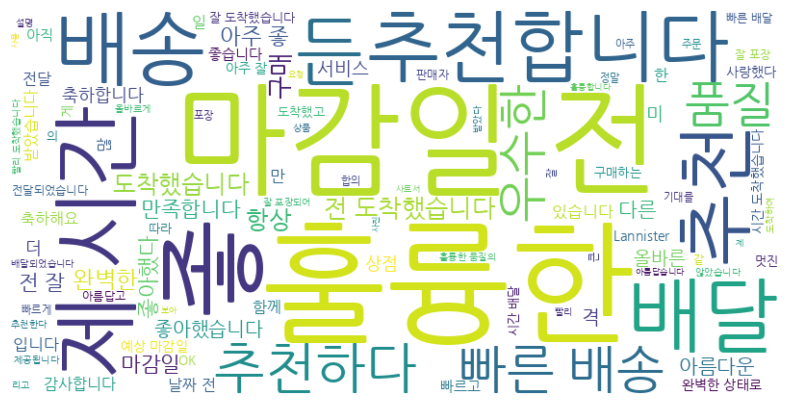

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np # numpy 라이브러리 추가

# Specify the path to a Korean font file
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # Example font path

# Instantiate a WordCloud object with Korean font and mask
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, font_path=font_path).generate(text_corpus)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
import re

# 텍스트 코퍼스를 단어로 분할
words = text_corpus.split()

# 숫자 단어를 제외한 단어 리스트 생성
filtered_words = [word for word in words if not re.match(r'^\d+$', word)]

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 단어 개수 출력 (상위 30개)
print("단어 빈도수 (상위 30개, 숫자 제외):")
for word, count in word_counts.most_common(30):
    print(f"{word}: {count}")

단어 빈도수 (상위 30개, 숫자 제외):
전: 177
마감일: 170
훌륭한: 162
좋: 115
시간: 90
잘: 80
제: 73
배송: 66
도착했습니다.: 66
빠른: 61
아주: 59
배달: 58
.: 55
우수한: 47
추천: 46
든: 46
추천하다: 43
완벽한: 40
!: 34
추천합니다.: 34
...: 32
항상: 32
도착했습니다: 30
품질: 30
구매: 28
많: 26
예상: 25
더: 25
한: 22
날짜: 22


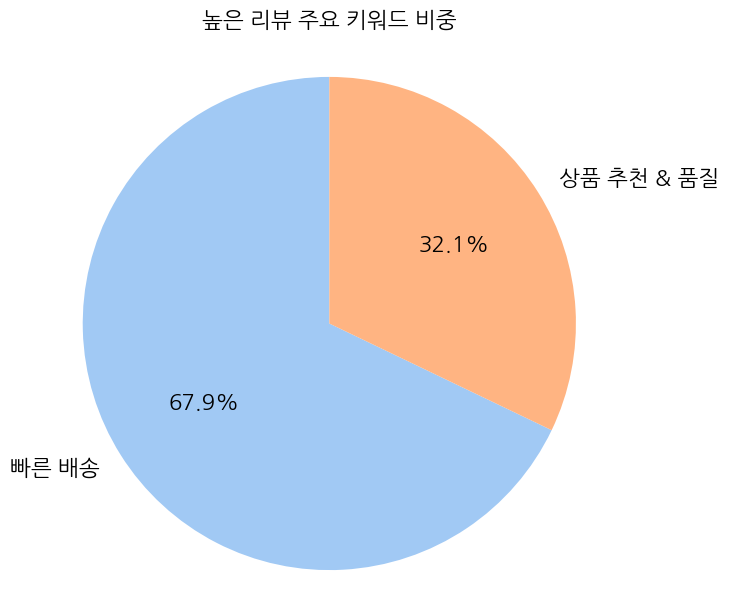

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 고객이 분류한 단어 빈도수 데이터 (수정된 데이터 사용)
category_counts = pd.Series({
    '빠른 배송': 765,
    '상품 추천 & 품질': 362
})

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), textprops={'fontsize': 16})
plt.title('높은 리뷰 주요 키워드 비중', fontsize=16, pad=20) # pad 값을 조정하여 간격 설정
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

-----
# 가설 시각화 & 통계분석
- 귀무가설: 배송 지연이 있는 경우와 없는 경우의 평균 리뷰 점수에 차이가 있을것이다.

### 데이터 전처리

고객_배송완료일 - 예상_배송완료일 = 배송지연일
음수면 빨리도착, 양수면 그 만큼 배송지연됨.
1. 시간은 고려 안할거니까 고객_배송완료일, 예상_배송완료일, 배송사_상품인수일, 판매자_발송기한은 시간 제거
2. 고객_배송완료일 - 예상_배송완료일 = 배송지연일 계산
3. 베송지연일이 높아질수록 리뷰 점수가 낮아질것이다. 분석

In [ ]:
date_cols = ['고객_배송완료일', '예상_배송완료일', '배송사_상품인수일', '판매자_발송기한']
for col in date_cols:
    df[col] = pd.to_datetime(df[col]).dt.date

In [ ]:
# 배송지연일 컬럼 생성
date_cols = ['고객_배송완료일', '예상_배송완료일']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df['배송지연일'] = (df['고객_배송완료일'] - df['예상_배송완료일']).dt.days
display(df[['고객_배송완료일', '예상_배송완료일', '배송지연일']].head())

,고객_배송완료일,예상_배송완료일,배송지연일
0,2017-10-10,2017-10-18,-8.0
1,2018-08-07,2018-08-13,-6.0
2,2018-08-17,2018-09-04,-18.0
3,2017-12-02,2017-12-15,-13.0
4,2018-02-16,2018-02-26,-10.0


## 시각화

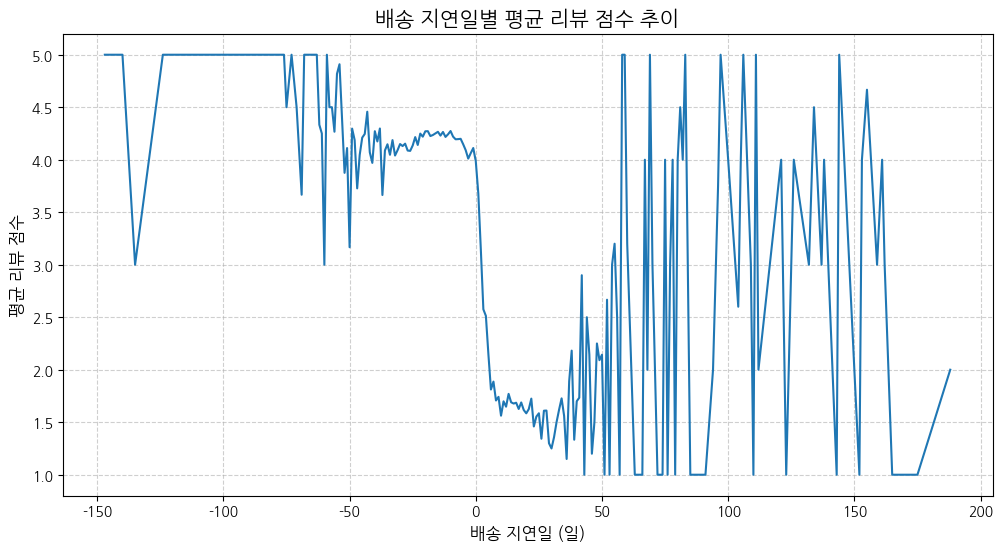

In [ ]:
# 배송 지연일별 평균 리뷰 점수 계산
avg_review_by_delay = df.groupby('배송지연일')['리뷰_점수'].mean().reset_index()

# 배송 지연일별 평균 리뷰 점수 선 그래프
plt.figure(figsize=(12, 6))
sns.lineplot(x='배송지연일', y='리뷰_점수', data=avg_review_by_delay)
plt.title('배송 지연일별 평균 리뷰 점수 추이', fontsize=15)
plt.xlabel('배송 지연일 (일)', fontsize=12)
plt.ylabel('평균 리뷰 점수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# 각 배송지연구간(30일단위)로 한 경우, 개수가 20개 이하인 구간은 제외
# Define the bins for delivery delay ranges (30-day intervals)
delay_bins_30days = [-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180, 210]

# Create a new column for delivery delay ranges (30-day intervals)
df['배송지연일_구간_30일'] = pd.cut(df['배송지연일'], bins=delay_bins_30days, right=False, include_lowest=True)

# Calculate the average review score for each 30-day delay range
avg_review_by_delay_range_30days = df.groupby('배송지연일_구간_30일')['리뷰_점수'].mean().reset_index()

# Get the counts for each delay range
delay_range_counts_30days = df['배송지연일_구간_30일'].value_counts().reset_index()
delay_range_counts_30days.columns = ['배송지연일_구간_30일', 'count']

# Merge average review scores with counts
avg_review_by_delay_range_30days = avg_review_by_delay_range_30days.merge(delay_range_counts_30days, on='배송지연일_구간_30일')

# Filter out ranges with count less than 20
avg_review_by_delay_range_30days_filtered = avg_review_by_delay_range_30days[avg_review_by_delay_range_30days['count'] >= 20]

# Sort the ranges for better visualization
avg_review_by_delay_range_30days_filtered['배송지연일_구간_30일'] = avg_review_by_delay_range_30days_filtered['배송지연일_구간_30일'].astype(str)
avg_review_by_delay_range_30days_filtered = avg_review_by_delay_range_30days_filtered.sort_values(by='배송지연일_구간_30일')

display(avg_review_by_delay_range_30days_filtered)

/tmp/ipython-input-2808887156.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review_by_delay_range_30days = df.groupby('배송지연일_구간_30일')['리뷰_점수'].mean().reset_index()
/tmp/ipython-input-2808887156.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_review_by_delay_range_30days_filtered['배송지연일_구간_30일'] = avg_review_by_delay_range_30days_filtered['배송지연일_구간_30일'].astype(str)


,배송지연일_구간_30일,리뷰_점수,count
4,"[-30, 0)",4.213546,99224
3,"[-60, -30)",4.096037,2820
2,"[-90, -60)",4.656250,32
5,"[0, 30)",2.573102,8368
6,"[30, 60)",1.748227,299
7,"[60, 90)",2.500000,38
8,"[90, 120)",3.095238,22


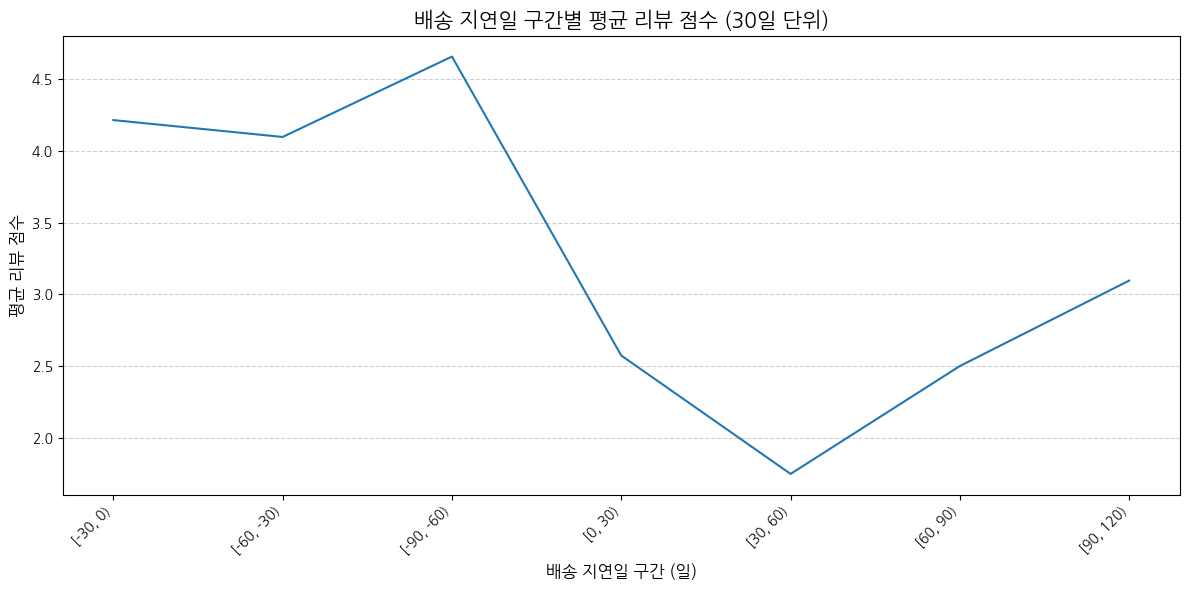

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot of average review scores by delivery delay range (30-day intervals), filtered for counts >= 20
plt.figure(figsize=(12, 6))
sns.lineplot(x='배송지연일_구간_30일', y='리뷰_점수', data=avg_review_by_delay_range_30days_filtered)
plt.title('배송 지연일 구간별 평균 리뷰 점수 (30일 단위)', fontsize=15)
plt.xlabel('배송 지연일 구간 (일)', fontsize=12)
plt.ylabel('평균 리뷰 점수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Define the bins for delivery delay ranges (10-day intervals)
# Determine appropriate min and max for bins based on data, or use a wide range
min_delay = df['배송지연일'].min()
max_delay = df['배송지연일'].max()
delay_bins_10days = list(range(int(min_delay) - (int(min_delay) % 10), int(max_delay) + 10, 10))

# Create a new column for delivery delay ranges (10-day intervals)
df['배송지연일_구간_10일'] = pd.cut(df['배송지연일'], bins=delay_bins_10days, right=False, include_lowest=True)

# Calculate the count for each 10-day delay range
delay_range_counts_10days = df['배송지연일_구간_10일'].value_counts().sort_index()

display(delay_range_counts_10days)

,count
배송지연일_구간_10일,
"[-150, -140)",2
"[-140, -130)",2
"[-130, -120)",2
"[-120, -110)",0
"[-110, -100)",1
"[-100, -90)",0
"[-90, -80)",2
"[-80, -70)",12
"[-70, -60)",18


/tmp/ipython-input-224815448.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review_by_delay_range_10days = df.groupby('배송지연일_구간_10일')['리뷰_점수'].mean().reset_index()


,배송지연일_구간_10일,리뷰_점수,count,배송지연일_구간_10일_str
9,"[-60, -50)",4.349398,83,"[-60, -50)"
10,"[-50, -40)",4.068966,554,"[-50, -40)"
11,"[-40, -30)",4.093216,2183,"[-40, -30)"
12,"[-30, -20)",4.177468,13118,"[-30, -20)"
13,"[-20, -10)",4.246269,50295,"[-20, -10)"
14,"[-10, 0)",4.180809,35811,"[-10, 0)"
15,"[0, 10)",2.892529,6221,"[0, 10)"
16,"[10, 20)",1.667761,1560,"[10, 20)"
17,"[20, 30)",1.566138,587,"[20, 30)"
18,"[30, 40)",1.509202,173,"[30, 40)"


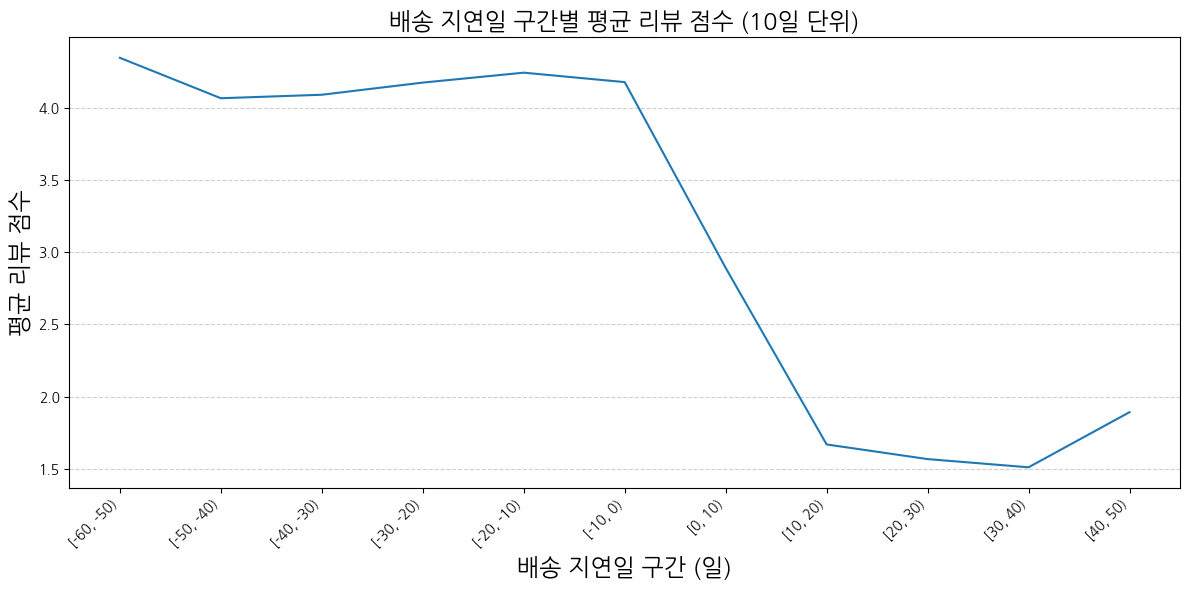

In [ ]:
# Calculate the average review score for each 10-day delay range
avg_review_by_delay_range_10days = df.groupby('배송지연일_구간_10일')['리뷰_점수'].mean().reset_index()

# Get the counts for each delay range (from the previous step)
# Assuming delay_range_counts_10days is available from cell 7e162c56
delay_range_counts_10days_df = delay_range_counts_10days.reset_index()
delay_range_counts_10days_df.columns = ['배송지연일_구간_10일', 'count']


# Merge average review scores with counts
avg_review_by_delay_range_10days = avg_review_by_delay_range_10days.merge(delay_range_counts_10days_df, on='배송지연일_구간_10일')

# Filter out ranges with count less than 80
avg_review_by_delay_range_10days_filtered = avg_review_by_delay_range_10days[avg_review_by_delay_range_10days['count'] >= 80].copy()

# Sort the ranges based on the interval order
avg_review_by_delay_range_10days_filtered = avg_review_by_delay_range_10days_filtered.sort_values(by='배송지연일_구간_10일')

# Convert '배송지연일_구간_10일' to string type for plotting
avg_review_by_delay_range_10days_filtered['배송지연일_구간_10일_str'] = avg_review_by_delay_range_10days_filtered['배송지연일_구간_10일'].astype(str)


display(avg_review_by_delay_range_10days_filtered)

# Create a line plot of average review scores by delivery delay range (10-day intervals), filtered for counts >= 80
plt.figure(figsize=(12, 6))
sns.lineplot(x='배송지연일_구간_10일_str', y='리뷰_점수', data=avg_review_by_delay_range_10days_filtered) # Plot using the string column
plt.title('배송 지연일 구간별 평균 리뷰 점수 (10일 단위)', fontsize=17)
plt.xlabel('배송 지연일 구간 (일)', fontsize=17)
plt.ylabel('평균 리뷰 점수', fontsize=17)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- 배송 지연이 안된경우 (음수인 경우)는 낮은 리뷰점수가 거의 없다.
- 배송 지연이 된 경우 (양수인 경우)는 낮은 점수와 높은 점수가 섞여있다.

## 통계분석

In [ ]:
from scipy import stats

# 배송 지연 여부에 따라 그룹 나누기
# 배송지연일이 0보다 크면 '지연', 0 이하면 '정시 또는 조기'로 분류
df['배송지연_여부'] = df['배송지연일'].apply(lambda x: '지연' if x > 0 else '정시 또는 조기')

# '배송지연_여부'가 '지연'인 그룹의 리뷰 점수
delayed_reviews = df[df['배송지연_여부'] == '지연']['리뷰_점수'].dropna()

# '배송지연_여부'가 '정시 또는 조기'인 그룹의 리뷰 점수
on_time_reviews = df[df['배송지연_여부'] == '정시 또는 조기']['리뷰_점수'].dropna()

# 독립표본 t-검정 수행
# equal_var=False는 Welch's t-test를 수행하며, 등분산 가정을 하지 않을 때 사용
ttest_result = stats.ttest_ind(delayed_reviews, on_time_reviews, equal_var=False)

# 결과 출력
print("## 배송 지연 여부에 따른 평균 리뷰 점수 독립표본 t-검정 결과")
print(f"배송 지연 그룹 평균 리뷰 점수: {delayed_reviews.mean():.4f}")
print(f"정시 또는 조기 그룹 평균 리뷰 점수: {on_time_reviews.mean():.4f}")
print(f"T-statistic: {ttest_result.statistic:.4f}")
print(f"P-value: {ttest_result.pvalue:.4f}")


# P-value 해석
alpha = 0.05
if ttest_result.pvalue < alpha:
    print(f"P-value ({ttest_result.pvalue:.4f})는 유의수준 ({alpha})보다 작으므로, 배송 지연이 있는 경우와 없는 경우의 평균 리뷰 점수에는 통계적으로 유의미한 차이가 있다고 할 수 있습니다 (귀무가설 기각).")
else:
    print(f"P-value ({ttest_result.pvalue:.4f})는 유의수준 ({alpha})보다 크므로, 배송 지연이 있는 경우와 없는 경우의 평균 리뷰 점수에는 통계적으로 유의미한 차이가 있다고 단정하기 어렵습니다 (귀무가설 채택).")

## 배송 지연 여부에 따른 평균 리뷰 점수 독립표본 t-검정 결과
배송 지연 그룹 평균 리뷰 점수: 2.2566
정시 또는 조기 그룹 평균 리뷰 점수: 4.1351
T-statistic: -98.5638
P-value: 0.0000
P-value (0.0000)는 유의수준 (0.05)보다 작으므로, 배송 지연이 있는 경우와 없는 경우의 평균 리뷰 점수에는 통계적으로 유의미한 차이가 있다고 할 수 있습니다 (귀무가설 기각).


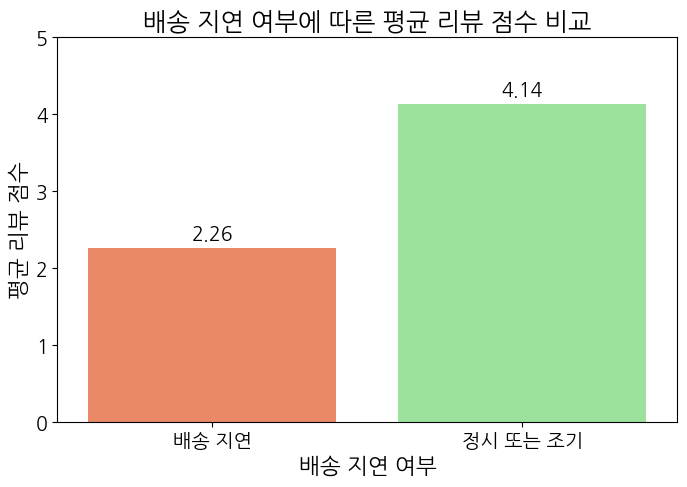

In [ ]:
# Create a DataFrame for plotting the average review scores
avg_review_df = pd.DataFrame({
    '배송지연_여부': ['배송 지연', '정시 또는 조기'],
    '평균 리뷰 점수': [delayed_reviews.mean(), on_time_reviews.mean()]
})

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='배송지연_여부', y='평균 리뷰 점수', hue='배송지연_여부', data=avg_review_df, palette={'배송 지연': 'coral', '정시 또는 조기': 'lightgreen'}, legend=False)
plt.title('배송 지연 여부에 따른 평균 리뷰 점수 비교', fontsize=18) # 제목 폰트 크기 키움
plt.xlabel('배송 지연 여부', fontsize=16) # x축 라벨 폰트 크기 키움
plt.ylabel('평균 리뷰 점수', fontsize=16) # y축 라벨 폰트 크기 키움
plt.ylim(0, 5) # 리뷰 점수 범위 설정
plt.rcParams['font.family'] = 'NanumGothic' # Set the font to NanumGothic for Korean characters
plt.xticks(fontsize=14) # x축 틱 라벨 폰트 크기 키움
plt.yticks(fontsize=14) # y축 틱 라벨 폰트 크기 키움

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14) # 숫자 폰트 크기 키움

plt.show()